### Question 4

#### Import relevant packages

In [1]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers.experimental import preprocessing
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

#### (a) Load the dataset `citrus_leaves` from `tensorflow_datasets`. Split the dataset into 60% for training and 40% for testing [**2 points**]

In [2]:

# Load the citrus leaves dataset
ds, info = tfds.load('citrus_leaves', split='train', as_supervised=True, with_info=True)





Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/594 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/citrus_leaves/0.1.2.incompleteQX7NTK/citrus_leaves-train.tfrecord*...:   0…

Dataset citrus_leaves downloaded and prepared to /root/tensorflow_datasets/citrus_leaves/0.1.2. Subsequent calls will reuse this data.


In [3]:

# Shuffle the dataset
buffer_size = info.splits['train'].num_examples
ds = ds.shuffle(buffer_size)

# Calculate train and test sizes
train_size = int(0.6 * buffer_size)
test_size = int(0.4 * buffer_size)

train_dataset = ds.take(train_size)
test_dataset = ds.skip(train_size).take(test_size)

(train_size, test_size)





(356, 237)

#### (b) Build a dense ANN with at least one hidden layer with at least two nodes. You should try different hyper parameter configurations to get the best performing ANN. [**2 points**]

In [4]:
# Data preprocessing
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize the images
    return image, label

# Apply the preprocessing function to the train and test datasets
train_dataset = train_dataset.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

# Building ANN
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(256, 256, 3)),  # Input layer
    tf.keras.layers.Dense(128, activation='relu'), # Hidden layer with 128 nodes
    tf.keras.layers.Dense(64, activation='relu'), # Additional hidden layer with 64 nodes
    tf.keras.layers.Dense(info.features['label'].num_classes, activation='softmax')  # Output layer
])

# Print the size of the output layer
num_classes = info.features['label'].num_classes
print("Number of classes:", num_classes)


Number of classes: 4


#### (c) Answer the following questions: [**1 point**]

What is the size of your output layer? [________4________]

What is the activation function of your output layer? [______softmax__________]

#### (d) Compile and train your model [**2 points**]

What is the loss function you use? [______sparse categorical crossentropy_________]

In [5]:

# Set up the optimiser value
optimizer_value = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Compile the model
model.compile(optimizer=optimizer_value,  # Set the learning rate here
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])




In [6]:
# Set the epoch value
epochs_value = 48

# Train the model
history = model.fit(train_dataset, epochs=epochs_value, validation_data=test_dataset)





Epoch 1/48
12/12 [==============================] - 16s 775ms/step - loss: 5.9597 - accuracy: 0.2753 - val_loss: 2.7785 - val_accuracy: 0.3882
Epoch 2/48
12/12 [==============================] - 7s 555ms/step - loss: 2.2475 - accuracy: 0.3343 - val_loss: 1.7351 - val_accuracy: 0.4135
Epoch 3/48
12/12 [==============================] - 7s 556ms/step - loss: 1.6922 - accuracy: 0.3539 - val_loss: 1.2379 - val_accuracy: 0.4979
Epoch 4/48
12/12 [==============================] - 7s 578ms/step - loss: 1.5034 - accuracy: 0.4270 - val_loss: 2.6358 - val_accuracy: 0.4177
Epoch 5/48
12/12 [==============================] - 8s 682ms/step - loss: 1.6274 - accuracy: 0.4382 - val_loss: 0.9889 - val_accuracy: 0.5190
Epoch 6/48
12/12 [==============================] - 6s 532ms/step - loss: 1.0227 - accuracy: 0.5421 - val_loss: 0.9403 - val_accuracy: 0.5359
Epoch 7/48
12/12 [==============================] - 7s 549ms/step - loss: 1.0185 - accuracy: 0.5506 - val_loss: 1.2261 - val_accuracy: 0.4768
Epoch

#### (e) Plot the training loss across the different epochs [**1 point**]

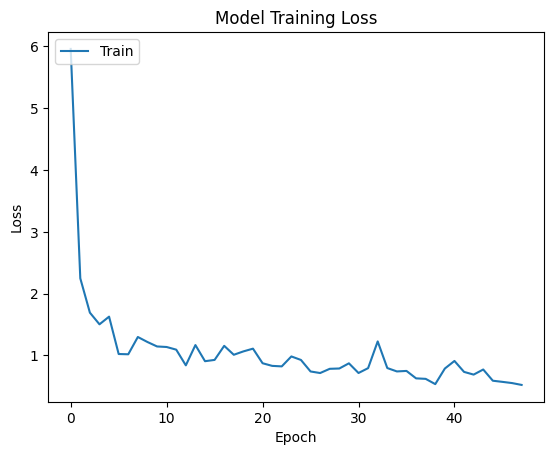

In [7]:
### Plotting training loss against epochs
plt.plot(history.history['loss'])
plt.title('Model Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()



#### (f) What is the overall accuracy and per-class accuracy on test dataset? [**2 points**]

In [13]:
# Evaluate the model and print overall accuracy on test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")



8/8 [==============================] - 1s 67ms/step - loss: 0.5456 - accuracy: 0.8439
Test Accuracy: 84.39%


What is the overall accuracy? [__________83.39%__________]

In [14]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Initialize lists to hold the actual and predicted labels
y_true = []
y_pred = []

# Iterate over the test dataset and collect the labels and predictions
for images, labels in test_dataset.unbatch():
    preds = model.predict(tf.expand_dims(images, axis=0))
    pred_class = np.argmax(preds, axis=1)[0]
    y_true.append(labels.numpy())
    y_pred.append(pred_class)

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate per-class accuracy
per_class_accuracy = cm.diagonal() / cm.sum(axis=1)

# Print per-class accuracy
print("Per-class accuracy:", per_class_accuracy)



1/1 [==============================] - 0s 38ms/step
Per-class accuracy: [0.56521739 0.97101449 0.6835443  0.9       ]
